# Assignment Email

This email was received from David Meltzer on July 6, 2023 at 8:59AM PST. I began work at 6:00PM that day.

> Hi Russell,
>
> As I mentioned last week, the challenge is the last step in our interview process.  I have provided the instructions below, but if you need any clarification or have problems with how we have defined this, please let us know.  To the extent you incur any AWS costs as part of this, we will reimburse you.  There is no fixed deadline for this, but we are hoping to have it back within the next week or so to be able to make a decision.
>
> ----
>
> Use the IOT intrusion detection dataset for a supervised anomaly detection task. The label column indicates whether each row's data is normal or anomalous.
You can choose an ML classifier for training on this dataset.
>
> The task is to build a classifier using the train dataset and deploy a trained model in Sagemaker.
You can use your personal AWS account to do this.
The classifier should be able to generate robust classification metrics on a held-out test/validation dataset. You can use a portion of your train set for validation metrics.
>
> As for output, please send us a link to the code and classification results in your git repository when you are done. Configuration should be through an orchestration system so we can re-create the environment programmatically.
>
> We will use a held-out test set to evaluate your model's performance.
>
> Test data can be found here: [https://github.com/netography/ml-engineer/archive/refs/heads/main.zip](https://github.com/netography/ml-engineer/archive/refs/heads/main.zip)
>
> It can also be found here: [https://www.dropbox.com/scl/fi/oz1fspqu4mago3wxeb9dp/IoT-network-intrustion-dataset-train.csv?rlkey=d6hblxlw4t163tt386w16gldi&dl=0](https://www.dropbox.com/scl/fi/oz1fspqu4mago3wxeb9dp/IoT-network-intrustion-dataset-train.csv?rlkey=d6hblxlw4t163tt386w16gldi&dl=0)
>
> -Dave

In [1]:
import pandas as pd

pd.set_option('display.max_columns', 100)

# Load and Evaluate the Flow Logs

In [2]:
train_df = pd.read_parquet("data/ml-engineer-main/iot_network_intrustion_dataset_train.parquet")
train_df = train_df.rename(columns={"Unnamed: 0": "ID"})

train_df.head()

,ID,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,315192,192.168.0.13-192.168.0.16-56361-10101-17,192.168.0.13,56361,192.168.0.16,10101,17,25/07/2019 03:23:29 AM,115,1,1,402.0,1430.0,402.0,402.0,402.0,0.000000,1430.0,1430.0,1430.0,0.000000,1.593043e+07,17391.304348,115.0,0.000000,115.0,115.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,8,8,8695.652174,8695.652174,402.0,1430.0,1087.333333,593.516077,352261.333333,0,0,0,0,0,0,0,0,1.0,1631.000000,402.0,1430.0,0,0,0,0,0,0,1,402,1,1430,-1,-1,1,0,0.0,0.0,0.0,0.0,115.0,0.000000,115.0,115.0,Anomaly,Mirai,Mirai-Ackflooding
1,104915,192.168.0.24-222.239.240.107-57678-443-6,192.168.0.24,57678,222.239.240.107,443,6,20/05/2019 05:00:15 AM,259,0,3,0.0,4344.0,0.0,0.0,0.0,0.000000,1448.0,1448.0,1448.0,0.000000,1.677220e+07,11583.011583,129.5,12.020815,138.0,121.0,0.0,0.0,0.0,0.0,0.0,259.0,129.5,12.020815,138.0,121.0,0,0,0,0,0,96,0.000000,11583.011583,1448.0,1448.0,1448.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,1930.666667,0.0,1448.0,0,0,0,0,0,0,0,0,3,4344,-1,139,0,0,0.0,0.0,0.0,0.0,129.5,12.020815,138.0,121.0,Normal,Normal,Normal
2,363451,192.168.0.13-192.168.0.16-9020-56266-6,192.168.0.16,56266,192.168.0.13,9020,6,10/09/2019 01:47:48 AM,123,0,2,0.0,1418.0,0.0,0.0,0.0,0.000000,1388.0,30.0,709.0,960.251009,1.152846e+07,16260.162602,123.0,0.000000,123.0,123.0,0.0,0.0,0.0,0.0,0.0,123.0,123.0,0.000000,123.0,123.0,0,0,0,0,0,64,0.000000,16260.162602,30.0,1388.0,935.333333,784.041666,614721.333333,0,0,0,0,1,0,0,0,0.0,1403.000000,0.0,709.0,0,0,0,0,0,0,0,0,2,1418,-1,1869,0,0,0.0,0.0,0.0,0.0,123.0,0.000000,123.0,123.0,Anomaly,Mirai,Mirai-Hostbruteforceg
3,477181,192.168.0.13-192.168.0.16-9020-52704-6,192.168.0.16,52704,192.168.0.13,9020,6,11/07/2019 01:12:32 AM,148,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,1388.0,1388.0,0.000000,1.875676e+07,13513.513514,148.0,0.000000,148.0,148.0,0.0,0.0,0.0,0.0,0.0,148.0,148.0,0.000000,148.0,148.0,0,0,0,0,0,64,0.000000,13513.513514,1388.0,1388.0,1388.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,2082.000000,0.0,1388.0,0,0,0,0,0,0,0,0,2,2776,-1,1869,0,0,0.0,0.0,0.0,0.0,148.0,0.000000,148.0,148.0,Anomaly,Scan,Scan Hostport
4,606027,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:28 AM,282,2,1,1904.0,1430.0,1430.0,474.0,952.0,675.994083,1430.0,1430.0,1430.0,0.000000,1.182270e+07,10638.297872,141.0,70.710678,191.0,91.0,191.0,191.0,0.0,191.0,191.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,16,8,7092.198582,3546.099291,474.0,1430.0,1191.000000,478.000000,228484.000000,0,0,0,0,0,0,0,0,0.0,1588.000000,952.0,1430.0,0,0,0,0,0,0,2,1904,1,1430,-1,-1,2,0,0.0,0.0,0.0,0.0,141.0,70.710678,191.0,91.0,Anomaly,Mirai,Mirai-Ackflooding


In [3]:
train_df.describe()

,ID,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
count,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000,5.006260e+05,5.006260e+05,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000,500626.0,500626.000000,500626.0,500626.000000,500626.000000,500626.000000,5.006260e+05,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000,500626.0,500626.0,500626.0,500626.0,500626.0,500626.0,500626.000000,500626.000000,500626.000000,500626.000000,500626.0,500626.000000,500626.000000,500626.0,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000,500626.000000
mean,313032.637084,35045.114962,16392.202506,9.970825,631.768646,1.676425,1.466394,569.632550,926.820031,392.079391,347.845919,373.187747,28.075772,681.141894,588.476344,636.863302,62.921255,inf,inf,482.905193,61.509933,563.190258,443.545141,100.019328,51.632779,27.166793,83.542904,34.131927,513.962859,445.891003,28.053083,484.683185,428.262901,0.0,0.026593,0.0,0.000056,22.478385,33.657996,5.046282e+04,27842.365842,511.434160,699.787768,633.339985,102.517288,69649.683424,0.000539,0.092724,0.000511,0.026593,0.530674,0.000056,0.000216,0.000068,0.364939,914.822026,373.187747,636.863302,0.0,0.0,0.0,0.0,0.0,0.0,1.676425,569.632550,1.466394,926.820031,-1.0,5886.377595,1.511318,0.0,3.678091,0.322559,4.087922,3.399306,501.095183,51.108721,558.971126,466.819931
std,180633.665830,24718.622926,17554.442272,5.380044,3455.950187,4.316453,0.904491,1143.744636,1314.801566,619.338077,587.993156,596.359647,144.160947,694.984157,682.867792,669.554267,227.584442,NaN,NaN,1898.921239,1129.725193,2835.568432,1733.844124,2172.224490,1193.921341,939.169121,1904.676273,987.380186,3112.799071,2234.546802,786.182321,2727.857064,2173.809583,0.0,0.160890,0.0,0.007478,40.852942,30.598958,1.649464e+05,78491.927333,653.887171,696.823235,652.269622,243.187185,179117.562307,0.023217,0.290045,0.022608,0.160890,0.499059,0.007478,0.014686,0.008241,0.499165,948.684981,596.359647,669.554267,0.0,0.0,0.0,0.0,0.0,0.0,4.316453,1143.744636,0.904491,1314.801566,0.0,11540.560492,4.341830,0.0,66.708160,16.269218,78.070821,63.866128,2105.975309,1120.897418,2835.755260,1934.422976
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.000540e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [4]:
print(f"{len(train_df):,}")

500,626


In [5]:
test_df = pd.read_parquet("data/ml-engineer-main/iot_network_intrustion_dataset_test.parquet")
test_df = test_df.rename(columns={"Unnamed: 0": "ID"})

test_df.head()

,ID,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,230773,163.152.127.193-192.168.0.13-10101-56361-17,192.168.0.13,56361,163.152.127.193,10101,17,20/08/2019 03:05:41 AM,141,2,1,1450.0,20.0,1430.0,20.0,725.0,997.020561,20.0,20.0,20.0,0.0,1.042553e+07,2.127660e+04,70.5,2.121320,72.0,69.0,69.0,69.0,0.0,69.0,69.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,16,8,14184.397163,7092.198582,20.0,1430.0,372.5,705.0,497025.0,0,0,0,0,0,0,0,0,0.0,496.666667,725.0,20.0,0,0,0,0,0,0,2,1450,1,20,-1,-1,2,0,0.0,0.0,0.0,0.0,70.5,2.121320,72.0,69.0,Anomaly,Mirai,Mirai-Hostbruteforceg
1,521223,192.168.0.24-210.89.164.90-64776-9988-17,192.168.0.24,64776,210.89.164.90,9988,17,25/07/2019 03:20:13 AM,1,1,1,32.0,32.0,32.0,32.0,32.0,0.000000,32.0,32.0,32.0,0.0,6.400000e+07,2.000000e+06,1.0,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,8,8,1000000.000000,1000000.000000,32.0,32.0,32.0,0.0,0.0,0,0,0,0,0,0,0,0,1.0,48.000000,32.0,32.0,0,0,0,0,0,0,1,32,1,32,-1,-1,1,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Anomaly,Mirai,Mirai-UDP Flooding
2,155309,192.168.0.13-192.168.0.16-9020-49784-6,192.168.0.13,9020,192.168.0.16,49784,6,20/05/2019 04:58:07 AM,482,0,5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000e+00,1.037344e+04,120.5,96.334487,265.0,72.0,0.0,0.0,0.0,0.0,0.0,482.0,120.5,96.334487,265.0,72.0,0,0,0,0,0,160,0.000000,10373.443983,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0.0,0.000000,0.0,0.0,0,0,0,0,0,0,0,0,5,0,-1,32505,0,0,0.0,0.0,0.0,0.0,120.5,96.334487,265.0,72.0,Normal,Normal,Normal
3,42560,192.168.0.24-104.118.134.215-43238-443-6,104.118.134.215,443,192.168.0.24,43238,6,25/07/2019 03:21:48 AM,269,1,1,1441.0,1441.0,1441.0,1441.0,1441.0,0.000000,1441.0,1441.0,1441.0,0.0,1.071375e+07,7.434944e+03,269.0,0.000000,269.0,269.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,32,32,3717.472119,3717.472119,1441.0,1441.0,1441.0,0.0,0.0,0,0,0,0,1,0,0,0,1.0,2161.500000,1441.0,1441.0,0,0,0,0,0,0,1,1441,1,1441,-1,252,1,0,0.0,0.0,0.0,0.0,269.0,0.000000,269.0,269.0,Anomaly,Mirai,Mirai-Ackflooding
4,326612,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:03 AM,73,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,1388.0,1388.0,0.0,3.802740e+07,2.739726e+04,73.0,0.000000,73.0,73.0,0.0,0.0,0.0,0.0,0.0,73.0,73.0,0.000000,73.0,73.0,0,0,0,0,0,64,0.000000,27397.260274,1388.0,1388.0,1388.0,0.0,0.0,0,0,0,0,1,0,0,0,0.0,2082.000000,0.0,1388.0,0,0,0,0,0,0,0,0,2,2776,-1,1869,0,0,0.0,0.0,0.0,0.0,73.0,0.000000,73.0,73.0,Anomaly,Scan,Scan Port OS


In [6]:
test_df.describe()

,ID,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
count,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000,1.251570e+05,1.251570e+05,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000,125157.0,125157.000000,125157.0,125157.000000,125157.000000,125157.000000,1.251570e+05,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000,125157.0,125157.0,125157.0,125157.0,125157.0,125157.0,125157.000000,125157.000000,125157.000000,125157.000000,125157.0,125157.000000,125157.000000,125157.0,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000,125157.000000
mean,312324.453926,34950.321404,16366.327453,9.973881,650.039686,1.672132,1.477073,575.164681,939.124699,394.131059,349.249175,375.032257,28.502382,682.555231,589.421311,638.083057,63.270811,inf,inf,485.691985,69.644639,576.339773,441.334636,110.712401,56.046393,29.779069,90.948920,36.868917,528.112235,451.258928,31.740977,494.791718,431.235472,0.0,0.025680,0.0,0.000032,22.538500,33.966075,4.968508e+04,27721.063378,512.491175,701.295069,634.974124,102.697929,69784.619603,0.000479,0.093834,0.000384,0.025680,0.529679,0.000032,0.000168,0.000064,0.363503,916.943221,375.032257,638.083057,0.0,0.0,0.0,0.0,0.0,0.0,1.672132,575.164681,1.477073,939.124699,-1.0,5859.113426,1.504295,0.0,4.109658,0.476690,4.891984,3.713568,508.138405,57.585072,571.818013,469.042563
std,180705.616965,24730.698084,17534.091479,5.379128,3655.330974,4.283955,2.040416,1231.716717,2842.547976,620.525868,588.837133,597.325066,145.134609,695.053098,683.225505,669.602542,228.528024,NaN,NaN,1868.432081,1272.601923,2986.174636,1660.025339,2384.478910,1281.777384,1034.638107,2054.696724,1050.800571,3281.603134,2273.858913,892.983099,2846.363293,2193.845851,0.0,0.158179,0.0,0.005653,44.136902,66.095549,1.622552e+05,78439.864950,654.209225,696.922620,652.452694,243.389047,179223.794858,0.021890,0.291599,0.019580,0.158179,0.499120,0.005653,0.012952,0.007995,0.499108,948.658631,597.325066,669.602542,0.0,0.0,0.0,0.0,0.0,0.0,4.283955,1231.716717,2.040416,2842.547976,0.0,11485.788681,4.296188,0.0,73.238386,32.992821,123.149347,65.081136,2140.656964,1274.170555,2986.293031,1921.831800
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.177108e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [7]:
print(f"{len(test_df):,}")

125,157


## How are flows unique?

In [8]:
print(f'{len(train_df["ID"].unique()):,}')

500,626


In [9]:
print(f'{len(train_df["Flow_ID"].unique()):,}')

51,873


In [10]:
print(f'{len(train_df[train_df.Flow_ID == "163.152.127.193-192.168.0.13-10101-56361-17"]):,}')

5,984


## This seems like it...

In [11]:
train_df[train_df.Flow_ID == "163.152.127.193-192.168.0.13-10101-56361-17"].sort_values(["Timestamp", "ID"])

,ID,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
218993,71240,163.152.127.193-192.168.0.13-10101-56361-17,192.168.0.13,56361,163.152.127.193,10101,17,20/08/2019 03:03:06 AM,127,1,1,1430.0,1430.0,1430.0,1430.0,1430.0,0.0,1430.0,1430.0,1430.0,0.0,2.251969e+07,15748.031496,127.0,0.0,127.0,127.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,8,8,7874.015748,7874.015748,1430.0,1430.0,1430.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,1.0,2145.0,1430.0,1430.0,0,0,0,0,0,0,1,1430,1,1430,-1,-1,1,0,0.0,0.0,0.0,0.0,127.0,0.0,127.0,127.0,Anomaly,Mirai,Mirai-Hostbruteforceg
483004,232004,163.152.127.193-192.168.0.13-10101-56361-17,192.168.0.13,56361,163.152.127.193,10101,17,20/08/2019 03:03:06 AM,168,1,1,1430.0,1430.0,1430.0,1430.0,1430.0,0.0,1430.0,1430.0,1430.0,0.0,1.702381e+07,11904.761905,168.0,0.0,168.0,168.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,8,8,5952.380952,5952.380952,1430.0,1430.0,1430.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,1.0,2145.0,1430.0,1430.0,0,0,0,0,0,0,1,1430,1,1430,-1,-1,1,0,0.0,0.0,0.0,0.0,168.0,0.0,168.0,168.0,Anomaly,Mirai,Mirai-Hostbruteforceg
413738,343336,163.152.127.193-192.168.0.13-10101-56361-17,192.168.0.13,56361,163.152.127.193,10101,17,20/08/2019 03:03:06 AM,71,1,1,1430.0,1370.0,1430.0,1430.0,1430.0,0.0,1370.0,1370.0,1370.0,0.0,3.943662e+07,28169.014085,71.0,0.0,71.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,8,8,14084.507042,14084.507042,1370.0,1430.0,1390.000000,34.641016,1200.000000,0,0,0,0,0,0,0,0,1.0,2085.0,1430.0,1370.0,0,0,0,0,0,0,1,1430,1,1370,-1,-1,1,0,0.0,0.0,0.0,0.0,71.0,0.0,71.0,71.0,Anomaly,Mirai,Mirai-Hostbruteforceg
148233,371295,163.152.127.193-192.168.0.13-10101-56361-17,192.168.0.13,56361,163.152.127.193,10101,17,20/08/2019 03:03:06 AM,117,1,1,1430.0,1430.0,1430.0,1430.0,1430.0,0.0,1430.0,1430.0,1430.0,0.0,2.444444e+07,17094.017094,117.0,0.0,117.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,8,8,8547.008547,8547.008547,1430.0,1430.0,1430.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,1.0,2145.0,1430.0,1430.0,0,0,0,0,0,0,1,1430,1,1430,-1,-1,1,0,0.0,0.0,0.0,0.0,117.0,0.0,117.0,117.0,Anomaly,Mirai,Mirai-Hostbruteforceg
344622,414818,163.152.127.193-192.168.0.13-10101-56361-17,192.168.0.13,56361,163.152.127.193,10101,17,20/08/2019 03:03:06 AM,121,1,1,1430.0,1430.0,1430.0,1430.0,1430.0,0.0,1430.0,1430.0,1430.0,0.0,2.363636e+07,16528.925620,121.0,0.0,121.0,121.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,8,8,8264.462810,8264.462810,1430.0,1430.0,1430.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,1.0,2145.0,1430.0,1430.0,0,0,0,0,0,0,1,1430,1,1430,-1,-1,1,0,0.0,0.0,0.0,0.0,121.0,0.0,121.0,121.0,Anomaly,Mirai,Mirai-Hostbruteforceg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

## Label Check... WTF?

As we see below, the data is just 6.4% normal event types. I would like to ask a question about this, but at this late date I will go with what I can determine.

In [12]:
train_df["Label"].value_counts()

Label
Anomaly    468446
Normal      32180
Name: count, dtype: int64

In [13]:
test_df["Label"].value_counts()

Label
Anomaly    117264
Normal       7893
Name: count, dtype: int64

### Discussion

We might assume the proportion isn't representative of the problem which means we might perform some sample that oversamples normal data. While I don't know how the data was sampled, I am going to assume it is a representative, random sample... it is the only prior I have evidence for at this time. The problem is thus flipped on its head. We need to detect normal traffic and throw out anomalies.

Perhaps this is a web server? Let's do some more EDA to understand it, so I can feel comfortable about proceeding.

In [14]:
[
    len(train_df["Src_IP"].unique()),
    len(train_df["Dst_IP"].unique()),
]

[46331, 460]

In [15]:
# How many IPs have more than 1 connection?
# ip_counts = train_df.groupby("Dst_IP").filter(lambda x: len(x) > 1)["Dst_IP"].value_counts()

ip_counts = train_df["Dst_IP"].value_counts()
ip_counts

Dst_IP
192.168.0.13       131558
192.168.0.16       114589
210.89.164.90      105099
192.168.0.24        68540
222.239.240.107      9016
                    ...  
168.126.63.1            1
222.210.95.147          1
111.84.5.129            1
31.237.26.217           1
52.114.128.44           1
Name: count, Length: 460, dtype: int64

<Axes: xlabel='count', ylabel='Count'>

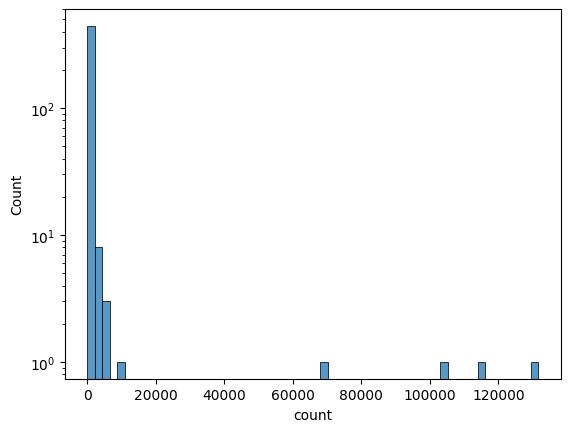

In [16]:
# Time for a histogram!
import seaborn as sns

sns.histplot(data=ip_counts, bins=60, log=True)

In [17]:
# Get a sense of the distribution across destination IPs
dst_label_counts = train_df[["Dst_IP", "Label"]].value_counts().reset_index().sort_values(by=["Dst_IP", "Label"], ascending=[True, False])
dlc_df = dst_label_counts[dst_label_counts["Dst_IP"].str.startswith("192.168.0")]
dlc_df

,Dst_IP,Label,count
346,192.168.0.1,Normal,4
58,192.168.0.1,Anomaly,239
11,192.168.0.13,Normal,3422
0,192.168.0.13,Anomaly,128136
20,192.168.0.14,Normal,1361
18,192.168.0.14,Anomaly,1599
70,192.168.0.15,Anomaly,175
4,192.168.0.16,Normal,25288
2,192.168.0.16,Anomaly,89301
67,192.168.0.23,Normal,195


In [18]:
ip_counts = train_df[["Dst_IP", "Label"]].value_counts().sort_index()
ip_counts

Dst_IP        Label  
0.0.0.16      Anomaly      2
              Normal       2
0.0.0.36      Anomaly     34
0.40.0.0      Anomaly      1
0.40.0.1      Anomaly      1
                        ... 
8.8.8.8       Anomaly      1
82.231.1.105  Normal       1
82.231.1.181  Anomaly      1
82.231.1.203  Anomaly      4
96.16.99.81   Anomaly    468
Name: count, Length: 485, dtype: int64

In [19]:
ip_val_counts = ip_counts.reset_index().rename(columns={"count": "IP_Count"})
ip_val_counts

,Dst_IP,Label,IP_Count
0,0.0.0.16,Anomaly,2
1,0.0.0.16,Normal,2
2,0.0.0.36,Anomaly,34
3,0.40.0.0,Anomaly,1
4,0.40.0.1,Anomaly,1
...,...,...,...
480,8.8.8.8,Anomaly,1
481,82.231.1.105,Normal,1
482,82.231.1.181,Anomaly,1
483,82.231.1.203,Anomaly,4


### Comparing Anomaly / Label Rations per IP

The following histogram is interesting... there is no clear pattern visible in terms of label per destination IP. I am going to stop my EDA here and move on to a baseline unsupervised 

<Axes: xlabel='IP_Count', ylabel='Count'>

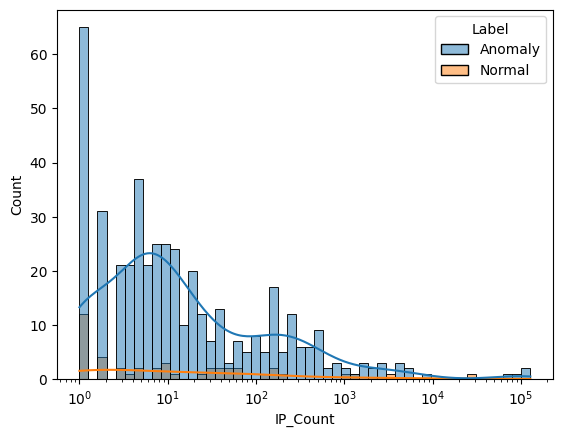

In [20]:
sns.histplot(data=ip_val_counts, x="IP_Count", hue="Label", kde=True, bins=50, log_scale=True)

## Network Visualization

I just have to look at this as a network before moving onto actual machine learning... as I just worked at Graphistry and am familiar with their tool.

In [24]:
import graphistry

ModuleNotFoundError: No module named 'graphistry'

# Feature Engineering

In [21]:
train_df.columns

Index(['ID', 'Flow_ID', 'Src_IP', 'Src_Port', 'Dst_IP', 'Dst_Port', 'Protocol',
       'Timestamp', 'Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts',
       'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean',
       'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags',
       'Bwd_URG_Flags', 'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s',
       'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean',
       'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt',
       'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt', 'URG_Flag_Cnt',
       'CWE_Flag_Count',

In [22]:
# Dump IDs - this must work on new data. Ignore errors for repeats.
train_df = train_df.drop(columns=["ID", "Flow_ID"], errors="ignore")

In [23]:
train_df.dtypes.value_counts()

float64    45
int64      34
object      6
Name: count, dtype: int64

### String Columns

I am going to ordinal encode the string columns. `Cat` and `Sub_Cat` in particular look useful. [Ordinal encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) in scikit-learn over label encoding allows for new values to be encoded once the model is deployed.

In [184]:
str_cols = list(train_df.columns[train_df.dtypes == "object"].values)
str_cols

['Src_IP', 'Dst_IP', 'Timestamp', 'Label', 'Cat', 'Sub_Cat']

In [178]:
train_df["Cat"]

0          Mirai
1         Normal
2          Mirai
3           Scan
4          Mirai
           ...  
500621      Scan
500622     Mirai
500623       DoS
500624     Mirai
500625     Mirai
Name: Cat, Length: 500626, dtype: object

In [179]:
train_df["Sub_Cat"]

0             Mirai-Ackflooding
1                        Normal
2         Mirai-Hostbruteforceg
3                 Scan Hostport
4             Mirai-Ackflooding
                  ...          
500621             Scan Port OS
500622       Mirai-UDP Flooding
500623          DoS-Synflooding
500624       Mirai-UDP Flooding
500625    Mirai-Hostbruteforceg
Name: Sub_Cat, Length: 500626, dtype: object

### Timestamp...

Not sure what to do with timestamp... it should be relative, but to what? Probably a difference between it and the previous flow log.

Leaving it out on a first pass.

## Statistical Anomaly Detection

We can use KMeans with 

In [94]:
import numpy as np
from sklearn.cluster import KMeans
# Generate a random dataset
data = np.random.normal(0, 1, (1000, 2))
# Fit the k-means algorithm to the dataset
kmeans = KMeans(n_clusters=5).fit(data)
# Get the distances of each point to its nearest cluster
distances = kmeans.transform(data)
nearest_distances = np.min(distances, axis=1)
# Define a threshold for anomaly detection
threshold = np.percentile(nearest_distances, 95)
# Identify anomalies
anomalies = np.where(nearest_distances > threshold)
# Print the indices of the anomalies
print("Anomalies:", anomalies)

Anomalies: (array([  4,  11,  32,  82, 119, 154, 156, 185, 209, 211, 231, 250, 263,
       264, 286, 306, 307, 311, 341, 363, 392, 437, 458, 473, 475, 482,
       486, 487, 508, 522, 544, 558, 567, 568, 605, 614, 623, 643, 676,
       701, 738, 758, 797, 800, 844, 865, 941, 970, 976, 981]),)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## PyOD

PyOD is the leading anomaly detection library...

In [249]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager
from pyod.models.knn import KNN 
from pyod.utils.data import generate_data, get_outliers_inliers

ModuleNotFoundError: No module named 'pyod'